<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_4_resz_sarokpontok_Eiffel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. SIFT pontok detektációja

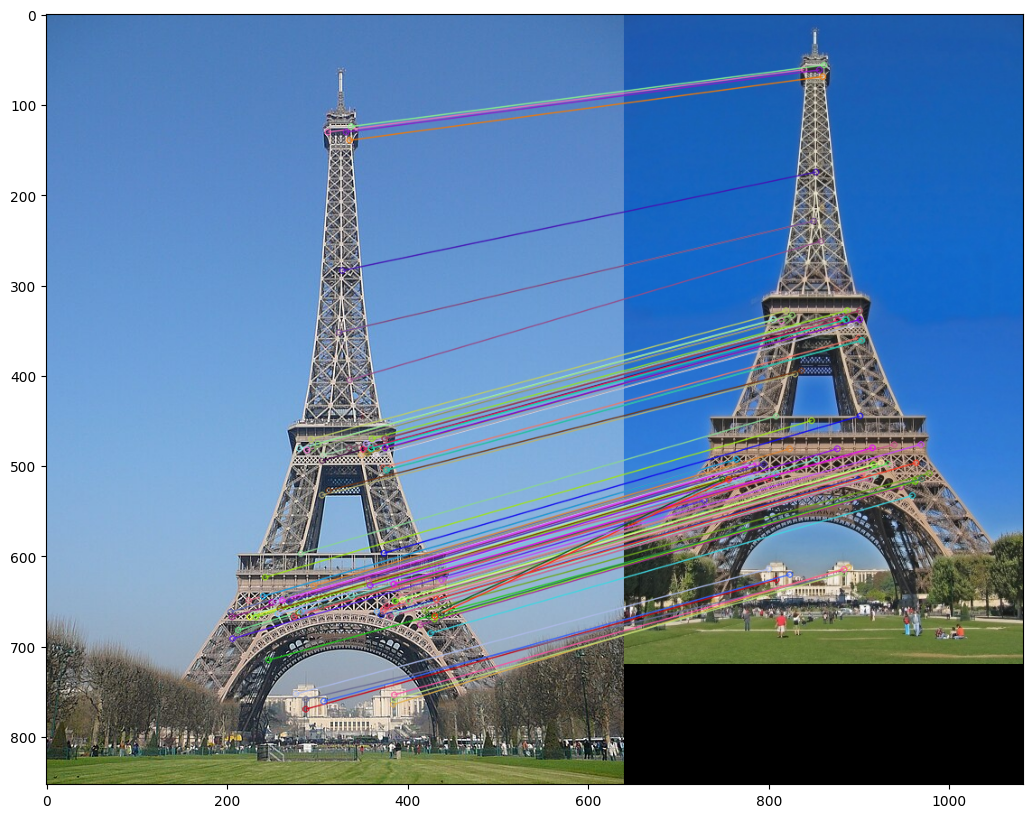

In [ ]:
# Képek beolvasása
src = cv.imread("/content/Eiffel.JPG", cv.IMREAD_COLOR)   # Kép 1
src2 = cv.imread("/content/eiffel2.jpg", cv.IMREAD_COLOR)  # Kép 2

#src = cv.resize(src, (400, 700))
#src2 = cv.resize(src2, (400, 700))

# SIFT detektor inicializálása
sift = cv.SIFT_create()

# SIFT segítségével megtaláljuk a kulcspontokat és leírókat az első és második képen
kp1, des1 = sift.detectAndCompute(src, None)  # Első kép kulcspontjai és leírói
kp2, des2 = sift.detectAndCompute(src2, None)  # Második kép kulcspontjai és leírói

# BFMatcher használata az alapértelmezett paraméterekkel
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Az arányteszt alkalmazása a jó illeszkedések kiválasztásához
good = []
for m, n in matches:
    if m.distance < 0.68 * n.distance:
        good.append([m])
# A cv.drawMatchesKnn a párosításokat várja, mint listákat
res = cv.drawMatchesKnn(src, kp1, src2, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Eredmény megjelenítése
f, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()
